In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [10]:
# Load the dataset
data = pd.read_csv('/content/social_ads.csv')
data.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [17]:
data.isnull().sum()


Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
# Define features and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth=5)
# Train the model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [25]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)



Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        73
           1       0.90      0.79      0.84        47

    accuracy                           0.88       120
   macro avg       0.89      0.87      0.87       120
weighted avg       0.88      0.88      0.88       120

[[69  4]
 [10 37]]


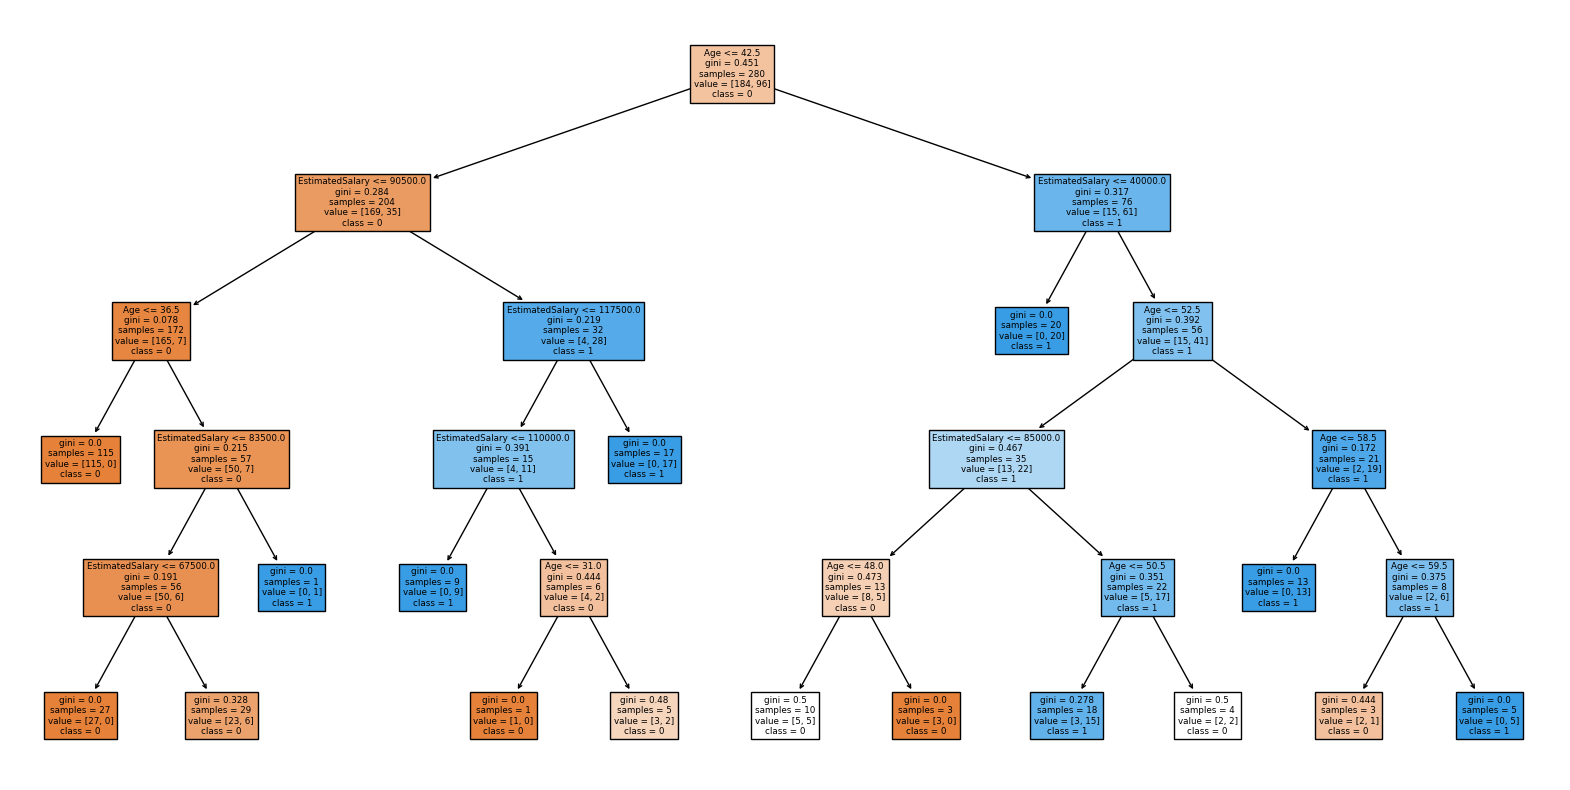

In [26]:
plt.figure(figsize=(20,10))
class_names = [str(class_) for class_ in dt_classifier.classes_]
plot_tree(dt_classifier, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [27]:
dclassifier = DecisionTreeClassifier(random_state=42,max_depth=5,criterion='entropy')
# Train the model
dclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [28]:
# Make predictions on the test set
y_pred = dclassifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)



Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        73
           1       0.91      0.83      0.87        47

    accuracy                           0.90       120
   macro avg       0.90      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120

[[69  4]
 [ 8 39]]


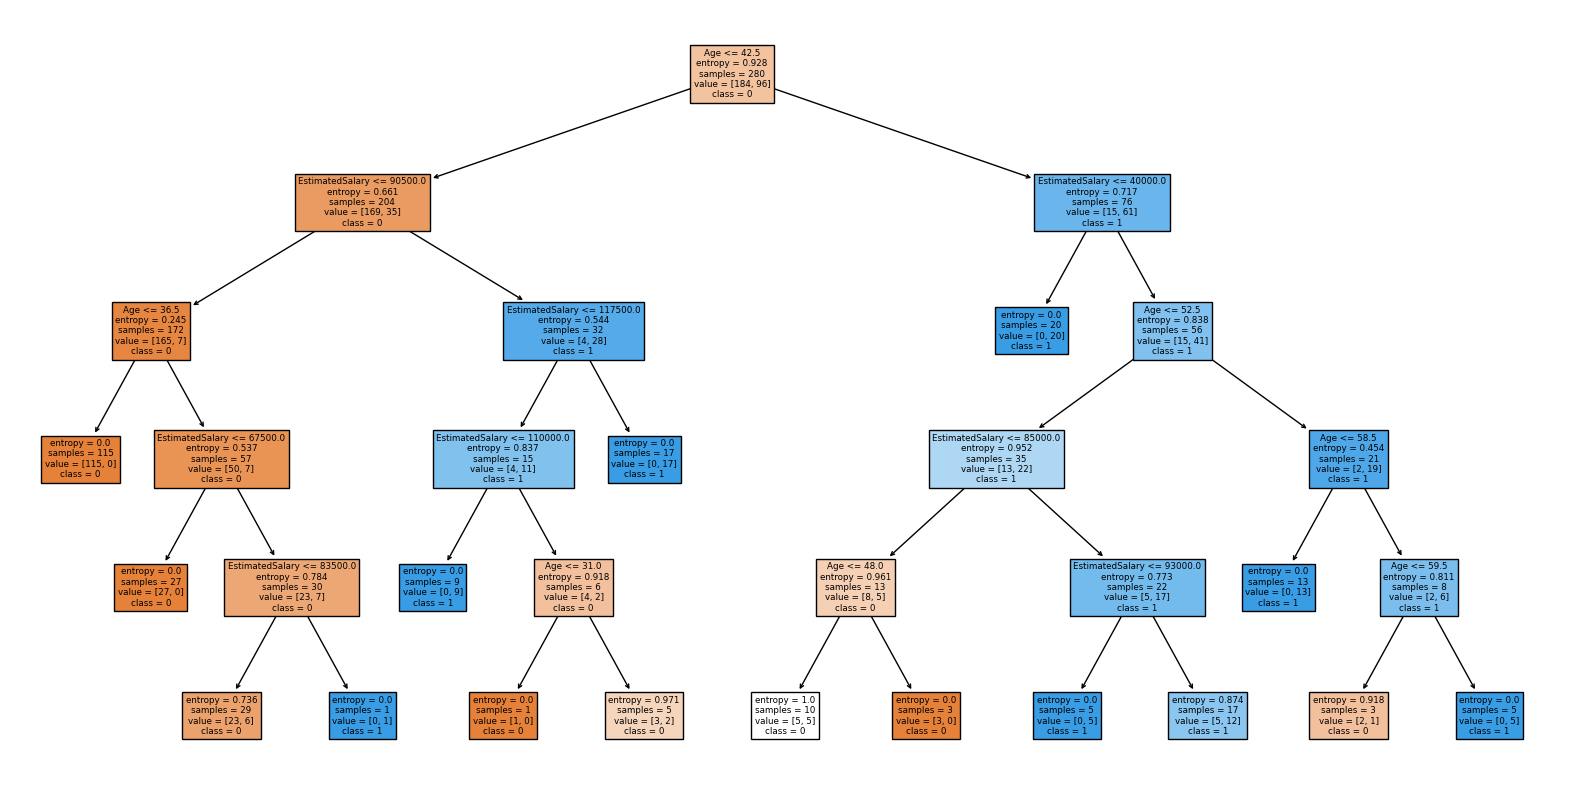

In [29]:
plt.figure(figsize=(20,10))
class_names = [str(class_) for class_ in dclassifier.classes_]
plot_tree(dclassifier, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()